![image](https://www.stengg.com/media/617349/data-analytics-header-image.jpg?anchor=center&amp;mode=crop&amp;width=1600&amp;height=200&amp;rnd=131890221430000000)

**TD  Analyse de texte**

Le but de cette séance de TD, c’est d'analyser de façon simple le texte proposé à l’aide du langage Python.

Étapes du TD
1.   Charger les bibliothèques
2.   Charger les données
3.   Nettoyage de données
4. Q1: identifier la langue
5. Q2 Tracez un nuage de mots pour observer les mots qui reviennent le plus souvent.
6. Q3 Identifier les mots les plus fréquents.
7. Le NLP avec SpaCy!
8. Q5 Analyser les dépendances d'un texte
9. Named Entity Recognition NER
10. Q6 NER



**1 Charger les bibliothèques**



In [1]:
!pip install langdetect

#Gestion des données et DataViz
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as pyo
import plotly.graph_objs as go

#Détection de la langue
from langdetect import detect
from wordcloud import WordCloud,STOPWORDS
import gensim, spacy, logging, warnings
from spacy import displacy
from spacy.util import minibatch, compounding

#Analyse de texte
from nltk.corpus import stopwords
import os.path
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer



import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('french')
from sklearn.feature_extraction.text import CountVectorizer



!pip install -U pip setuptools wheel
!pip install spacy
!python -m spacy download fr_core_news_md

import spacy
import fr_core_news_md
nlp = fr_core_news_md.load()
doc = nlp("Je suis Roque")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 MB 133.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


**2 Charger les données**

Source https://fr.trustpilot.com/review/www.cdiscount.com


In [2]:
url = "https://raw.githubusercontent.com/roquelealfr/td-text-analytics/main/cdiscount_reviews.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,author,headline,body,rating,item_reviewed,publisher,date_published
0,0,insomniak,parfait aucun problème engagement tenu,parfait aucun problème engagement tenu,5,Cdiscount,Trustpilot,2021-11-15T16:47:35.000Z
1,1,Guillaume,facile et rapide d'utilisation,facile et rapide d'utilisation,4,Cdiscount,Trustpilot,2021-11-15T16:44:16.000Z
2,2,ALAIN CONTROLE TECHNIQUE DEKRA,parfait,parfait tres bien,5,Cdiscount,Trustpilot,2021-11-15T16:35:56.000Z
3,3,jean jacques THEBAULT,rien a dire tout est parfait,rien a dire tout est parfait,5,Cdiscount,Trustpilot,2021-11-15T16:32:43.000Z
4,4,georges.hibouxgmail.com,Satisfait,Satisfait de mon achat .,5,Cdiscount,Trustpilot,2021-11-15T16:31:59.000Z


In [3]:
df.shape

(62980, 8)

Tirez un échantillon de 100 lignes de données au hasard.

In [4]:
df=df.sample(100,random_state=18)
df.shape

(100, 8)

**3. Nettoyage de données**

In [5]:
column=['Unnamed: 0']
df = df.drop(column, axis=1)

In [6]:
#Joignez le titre et le contenu
df['text'] = df['headline'] + ' ' + df['body']

In [7]:
df.head(100)

,author,headline,body,rating,item_reviewed,publisher,date_published,text
1669,Myriam,bien,bien je recommande ce site,5,Cdiscount,Trustpilot,2021-10-29T13:02:41.000Z,bien bien je recommande ce site
10101,Michel CHARLES,A ce jour toujours satisfait,A ce jour toujours satisfait,5,Cdiscount,Trustpilot,2021-08-17T08:32:30.000Z,A ce jour toujours satisfait A ce jour toujour...
25458,DOMINIQUE HERMANT,Pas de soucis lors de ma commande,Pas de soucis lors de ma commande . Et aucun p...,5,Cdiscount,Trustpilot,2021-03-20T18:06:47.000Z,Pas de soucis lors de ma commande Pas de souci...
31177,Patriarca,Très décue par ma dernière commande,Très décue par ma dernière commande : 1 montre...,1,Cdiscount,Trustpilot,2021-01-30T21:38:25.000Z,Très décue par ma dernière commande Très décue...
48743,Daniella,Facile pour commander et très à…rapide,Facile pour commander et très à l'écoute des p...,5,Cdiscount,Trustpilot,2020-10-08T11:48:09.000Z,Facile pour commander et très à…rapide Facile ...
...,...,...,...,...,...,...,...,...
46446,david de souza,toujour satisfait,toujour satisfait,5,Cdiscount,Trustpilot,2020-10-29T07:53:14.000Z,toujour satisfait toujour satisfait
40935,myriam girard,les cadeaux commander n arrivent pas…,les cadeaux commander n arrivent pas avant noe...,4,Cdiscount,Trustpilot,2020-11-29T10:49:04.000Z,les cadeaux commander n arrivent pas… les cade...
43970,Robert,"trés satisfait,jamais déçu","tres satisfait,jamais déçu",5,Cdiscount,Trustpilot,2020-11-11T18:47:38.000Z,"trés satisfait,jamais déçu tres satisfait,jama..."
25354,Mayotte,Très satisfaite,"Très satisfaite, facilité pour le choix du pro...",4,Cdiscount,Trustpilot,2021-03-22T07:20:47.000Z,"Très satisfaite Très satisfaite, facilité pour..."


**5 Q1**: identifier la langue

In [8]:
def detect_lang(texte):
    return detect(texte)

In [9]:
df["lang"] = df['body'].apply(detect_lang)
df.head(1)

,author,headline,body,rating,item_reviewed,publisher,date_published,text,lang
1669,Myriam,bien,bien je recommande ce site,5,Cdiscount,Trustpilot,2021-10-29T13:02:41.000Z,bien bien je recommande ce site,fr


Nettoyage des données

**NLP: Tokenization , Lemmatization**

**Stop word**
Le terme stop word ou mot vide désigne tous les mots n'ayant pas de réelle signification. On dit aussi qu'ils ne sont pas porteurs de sens. En effet, ils sont si courants et reviennent de façon tellement régulière qu’ils ne permettent pas de caractériser, au sens lexical, un texte par rapport à un autre texte.

Les stopwords français sont généralement des mots dits grammaticaux tels que des adverbes, des pronoms ou encore des mots de liaison.

In [10]:
stop_words = list(stopwords.words('french'))+['ctre','tcdicount','avoir','être','tre','très']
stop_words

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


**Lemmatisation**
lemmatisation consiste à identifier la fonction grammaticale d'un mot fléchi pour pouvoir en déduire son lemme.

In [11]:
def lemma_word(word):
    doc=nlp(word)
    for t in doc:
        token=t.lemma_
    return token
lemma_word('animaux')

'animal'

**Tokenisation**
La tokenisation est le processus qui consiste à décomposer des données complexes comme les paragraphes en unités simples appelées tokens.

In [12]:
def preprocess(row):
    content = row['text']
    tokens = nltk.word_tokenize(content)
    tokens= [w for w in tokens if w.isalpha()]
    tokens= [lemma_word(word) for word in tokens]
    tokens= [word for word in tokens if not word in stop_words]
    print(tokens)
    return tokens

df['words'] = df.apply(preprocess, axis=1)
df[['text', 'words']].head(10)

['bien', 'bien', 'recommande', 'site']
['a', 'jour', 'toujours', 'satisfait', 'a', 'jour', 'toujours', 'satisfait']
['souci', 'lors', 'commande', 'souci', 'lors', 'commande', 'aucun', 'probleme', 'livraison']
['décue', 'dernier', 'commande', 'décue', 'dernier', 'commande', 'montre', 'achetee', 'ecommerce', 'Christelle', 'Cdiscount', 'volatiliser', 'jamais', 'reçue', 'malgré', 'tout', 'plainte', 'poste', 'Cdiscount', 'difficlmnt', 'joignable', 'daignent', 'plus', 'repondre']
['facile', 'commander', 'facile', 'commander', 'personne']
['SOUCIS', 'a', 'jour', 'tout', 'aller', 'bien', 'SOUCIS', 'a', 'jour', 'tout', 'aller', 'bien']
['tout', 'bien', 'jamais', 'souci', 'tout', 'bien', 'jamais', 'souci']
['ok', 'problème', 'ok', 'problème']
['commander', 'oeil', 'fermer', 'toujours', 'satisfaite']
['ser', 'carte', 'cdiscount', 'refus', 'ser', 'carte', 'cdiscount', 'refus', 'paymant', 'pourquoi', 'sai', 'rien', 'aucun', 'info', 'temps', 'fidèle', 'vai', 'changer', 'dire', 'paie', 'tout', 'mois'

,text,words
1669,bien bien je recommande ce site,"[bien, bien, recommande, site]"
10101,A ce jour toujours satisfait A ce jour toujour...,"[a, jour, toujours, satisfait, a, jour, toujou..."
25458,Pas de soucis lors de ma commande Pas de souci...,"[souci, lors, commande, souci, lors, commande,..."
31177,Très décue par ma dernière commande Très décue...,"[décue, dernier, commande, décue, dernier, com..."
48743,Facile pour commander et très à…rapide Facile ...,"[facile, commander, facile, commander, personne]"
40618,PAS DE SOUCIS A CE JOUR TOUT VA BIEN PAS DE SO...,"[SOUCIS, a, jour, tout, aller, bien, SOUCIS, a..."
18526,"tout est tres bien,jamais de souci tout est tr...","[tout, bien, jamais, souci, tout, bien, jamais..."
14331,ok pas de problème ok pas de problème,"[ok, problème, ok, problème]"
46024,Commander les yeux fermé Toujours satisfaite,"[commander, oeil, fermer, toujours, satisfaite]"
36087,me sers de la carte cdiscount refus de… me ser...,"[ser, carte, cdiscount, refus, ser, carte, cdi..."


In [13]:
df['words_string'] = [','.join(map(str, l)) for l in df['words']]
df.head()

,author,headline,body,rating,item_reviewed,publisher,date_published,text,lang,words,words_string
1669,Myriam,bien,bien je recommande ce site,5,Cdiscount,Trustpilot,2021-10-29T13:02:41.000Z,bien bien je recommande ce site,fr,"[bien, bien, recommande, site]","bien,bien,recommande,site"
10101,Michel CHARLES,A ce jour toujours satisfait,A ce jour toujours satisfait,5,Cdiscount,Trustpilot,2021-08-17T08:32:30.000Z,A ce jour toujours satisfait A ce jour toujour...,fr,"[a, jour, toujours, satisfait, a, jour, toujou...","a,jour,toujours,satisfait,a,jour,toujours,sati..."
25458,DOMINIQUE HERMANT,Pas de soucis lors de ma commande,Pas de soucis lors de ma commande . Et aucun p...,5,Cdiscount,Trustpilot,2021-03-20T18:06:47.000Z,Pas de soucis lors de ma commande Pas de souci...,fr,"[souci, lors, commande, souci, lors, commande,...","souci,lors,commande,souci,lors,commande,aucun,..."
31177,Patriarca,Très décue par ma dernière commande,Très décue par ma dernière commande : 1 montre...,1,Cdiscount,Trustpilot,2021-01-30T21:38:25.000Z,Très décue par ma dernière commande Très décue...,fr,"[décue, dernier, commande, décue, dernier, com...","décue,dernier,commande,décue,dernier,commande,..."
48743,Daniella,Facile pour commander et très à…rapide,Facile pour commander et très à l'écoute des p...,5,Cdiscount,Trustpilot,2020-10-08T11:48:09.000Z,Facile pour commander et très à…rapide Facile ...,fr,"[facile, commander, facile, commander, personne]","facile,commander,facile,commander,personne"


**6 Q2** Tracez un nuage de mots pour observer les mots qui reviennent le plus souvent.

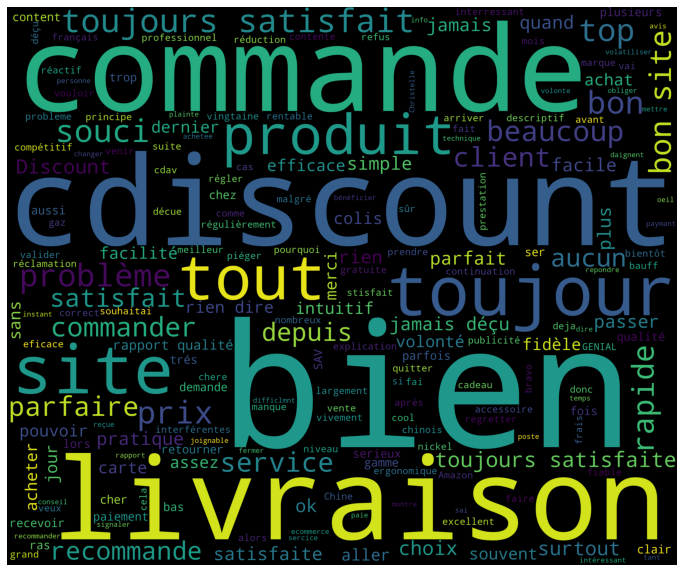

In [14]:
words = " ".join(df['words_string'])
                 
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
                 
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**7 Q3** Identifier les mots les plus fréquents.

In [15]:
#Instanciez l'objet vectoriel
cv = CountVectorizer()

#Convertir les critiques en une matrice - où chaque ligne représente un texte spécifique dans les critiques et chaque colonne représente 
#un mot du vocabulaire. words[i,j] est l'occurrence du mot j dans le texte i.
words = cv.fit_transform(df["words_string"])

#sum_words est un vecteur qui contient la somme de chaque occurrence de mot dans tous les textes des critiques. 
#Nous ajoutons les éléments pour chaque colonne de la matrice des mots.
sum_words = words.sum(axis=0)

#Créer une liste de tuples avec le mot et la fréquence. cv.vocabulary_ est un dict, où les clés sont les mots (caractéristiques) et les valeurs sont des indices. 
#les mots (caractéristiques) et les valeurs sont des indices
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

#Trier la liste des tuples qui contiennent le mot et leur occurrence dans le corpus.
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

#Créer un dataframe
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

#Plot
word_freq_bar = go.Bar(x = frequency["word"].head(10), y = frequency["freq"].head(10))
layout = go.Layout(title = "LES 20 MOTS LES PLUS FRÉQUENTS", yaxis_title = "Count")
fig = go.Figure(word_freq_bar,layout)
iplot(fig)

**9 Le NLP avec SpaCy !**

In [16]:
sample_review=df.iloc[2]['body']
sample_review

'Pas de soucis lors de ma commande . Et aucun probleme pour la livraison'

In [17]:
parsed_review = nlp(sample_review)
parsed_review

Pas de soucis lors de ma commande . Et aucun probleme pour la livraison

In [18]:
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py

--2022-03-10 18:39:32--  https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6896 (6.7K) [text/plain]
Saving to: ‘explacy.py.1’

explacy.py.1        100%[===================>]   6.73K  --.-KB/s    in 0s      

2022-03-10 18:39:32 (65.2 MB/s) - ‘explacy.py.1’ saved [6896/6896]



**10.** **Q5** Analyser les dépendances d'un texte

**Analyse des dépendances**
Chaque phrase a une structure grammaticale et, à l'aide de l'analyse syntaxique des dépendances, nous pouvons extraire cette structure. Grâce à elle nous allons pouvoir recomposer une phrase en reliant les mots dans leur contexte. Dans l’exemple ci-dessous nous reprenons notre phrase et indiquons chaque dépendance avec les propriétés.

In [19]:
import explacy
explacy.print_parse_info(nlp, 'Je suis Roque')

Dep tree Token Dep type Lemma Part of Sp
──────── ───── ──────── ───── ──────────
┌──►     Je    nsubj    je    PRON      
│┌─►     suis  cop      être  AUX       
└┴──     Roque ROOT     roque NOUN      


In [20]:
explacy.print_parse_info(nlp,df.iloc[2]['body'])

Dep tree  Token     Dep type  Lemma     Part of Sp
───────── ───────── ───────── ───────── ──────────
┌─►┌───── Pas       advmod    pas       ADV       
│  │  ┌─► de        case      de        DET       
│  └─►└── soucis    nmod      souci     NOUN      
│  ┌─►┌── lors      case      lors      ADV       
│  │  └─► de        fixed     de        ADP       
│  │  ┌─► ma        nmod:poss mon       DET       
└──┴──┼── commande  ROOT      commande  NOUN      
      └─► .         punct     .         PUNCT     
     ┌──► Et        cc        et        CCONJ     
     │┌─► aucun     det       aucun     DET       
  ┌──┴┴── probleme  ROOT      probleme  NOUN      
  │  ┌──► pour      case      pour      ADP       
  │  │┌─► la        det       le        DET       
  └─►└┴── livraison nmod      livraison NOUN      


In [21]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_review):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,Pas,pas,ADV,ADV___,advmod,Xxx,True,True,False
1,de,"(de,)",DET,DET__Definite=Ind|Number=Sing|PronType=Art,case,xx,True,True,False
2,soucis,"(souci,)",NOUN,NOUN__Gender=Masc|Number=Plur,nmod,xxxx,True,False,False
3,lors,"(lors,)",ADV,ADV___,case,xxxx,True,True,False
4,de,"(de,)",ADP,ADP___,fixed,xx,True,True,False
5,ma,"(mon,)",DET,DET__Gender=Fem|Number=Sing|Poss=Yes,nmod:poss,xx,True,True,False
6,commande,"(commande,)",NOUN,NOUN__Gender=Fem|Number=Sing,ROOT,xxxx,True,False,False
7,.,"(.,)",PUNCT,PUNCT___,punct,.,False,False,True
8,Et,"(et,)",CCONJ,CCONJ___,cc,Xx,True,True,False
9,aucun,"(aucun,)",DET,DET__Gender=Masc|Number=Sing,det,xxxx,True,True,False


Heureusement SpaCy a une fonction de trace pour rendre ce résultat visuel. Pour l’utiliser vous devez importer displacy:

In [22]:
sentence_spans = list(parsed_review.sents)
sentence_spans

[Pas de soucis lors de ma commande ., Et aucun probleme pour la livraison]

In [23]:
displacy.render(parsed_review, style='dep', jupyter=True,options={'distance': 140})

In [24]:
options = {'compact': True, 'bg': 'blue','distance': 140,
           'color': 'white', 'font': 'Trebuchet MS'}
displacy.render(parsed_review, jupyter=True, style='dep', options=options)

In [25]:
spacy.explain("ADJ") ,spacy.explain("det") ,spacy.explain("ADP") ,spacy.explain("prep")  # to understand tags

('adjective', 'determiner', 'adposition', 'prepositional modifier')

**11 Named Entity Recognition NER**
SpaCy dispose d’un système de reconnaissance d’entités statistiques (NER ou Named Entity Recognition) très performant et qui va assigner des étiquettes à des plages contiguës de tokens.

In [26]:
doc = nlp("Je m'appelle Roque Leal, je viens du Venezuela, je vis à Lyon et je travaille chez Google.")

for ent in doc.ents:
    print(ent.text, ent.label_)

Roque Leal PER
Venezuela LOC
Lyon LOC
Google ORG


Le code précédent parcours les mots dans leur contexte et va reconnaître que Roque est un prenom, Venezuela est un élément de localisation et que Google est une organisation (commerciale) :

**12** Q6 NER

In [27]:
spacy.displacy.render(doc, style='ent', jupyter=True)

![image](https://cdn.woopic.com/v1/AUTH_9ffb653181284b0abe5e45d7014095b2/options/HEADER_APPLI_TV_1440@1x_617be8ba06f84426e290723e.jpg)

**Mise en oeuvre TD Practique**

Source https://fr.trustpilot.com/review/www.orange.fr

In [28]:
url = "https://raw.githubusercontent.com/roquelealfr/td-text-analytics/main/OrangeFR.csv"
df = pd.read_csv(url)
df.head()

,Date,Titres,Contents
0,2021-03-31,arnaque,Mon père qui vient de décéder possédait une of...
1,2021-03-31,c'est trop long à expliqué tellement…,c'est trop long à expliqué tellement aucunes d...
2,2021-03-31,Le service client d'Orange est déplorable !,Le service client téléphonique d'Orange est dé...
3,2021-03-30,J'attend toujours ma carte sim depuis plus de ...,J'ai dut changer de mobil suite à un vol j'ai...
4,2021-03-30,Orange c'est quoi la fibre ?,Orange c'est quoi la fibre ?Voila plusieurs mo...
